In [174]:
# Import python modules
import matplotlib.pyplot as plt
import numpy as np
import kaggle
import time
import math

# Sklearn libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Read in train and test data
def read_data_power_plant():
	print('Reading power plant dataset ...')
	train_x = np.loadtxt('../../Data/PowerOutput/data_train.txt')
	train_y = np.loadtxt('../../Data/PowerOutput/labels_train.txt')
	test_x = np.loadtxt('../../Data/PowerOutput/data_test.txt')

	return (train_x, train_y, test_x)

def read_data_localization_indoors():
	print('Reading indoor localization dataset ...')
	train_x = np.loadtxt('../../Data/IndoorLocalization/data_train.txt')
	train_y = np.loadtxt('../../Data/IndoorLocalization/labels_train.txt')
	test_x = np.loadtxt('../../Data/IndoorLocalization/data_test.txt')

	return (train_x, train_y, test_x)

# Compute MAE
def compute_error(y_hat, y):
	# mean absolute error
	return np.abs(y_hat - y).mean()

############################################################################



In [175]:
############################################################################
#                    Question 1   DecisionTreeRegressor                    #
############################################################################

In [176]:
def decisionTreeRegressor_test(max_depths, train_x, train_y, test_x):
    """Using 5-fold cross-validation, and Decision tree regression 
    estimate the output of sample error for each model. It will test all the given max depths

    Args:
        max_depths (int array): The decision trees using the maximum depths.
        train_x (numpy.array): Training data set.
        train_y (numpy.array): Training data set.
        test_x (numpy.array): Test data set.
        
    """
        
    kf = KFold(n_splits=5) # Define the split - into 5 folds 
    kf.get_n_splits(train_x) # returns the number of splitting iterations in the cross-validator
    print(kf) # display KFold's properties
    
    error_y = np.array([])  # To store the error value of each model
    time_each_model = np.array([]) # To store the time used in each model

    # loop cross-validation for each depth from max_depths
    for depth in max_depths:
        print("test with max depth:", depth )
        start = time.time()  
        
        for train_index, test_index in kf.split(train_x, train_y ):
#         print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = train_x[train_index], train_x[test_index]
            y_train, y_test = train_y[train_index], train_y[test_index]
              
            #Decision Tree
            clf = DecisionTreeRegressor(max_depth=depth) # create a decision tree with max_depth is depth
            clf = clf.fit(X_train, y_train)
            error_y = np.append(error_y,compute_error(clf.predict(X_test),y_test)) # compute error and store in error_y

        end = time.time()
        elapsed = end - start
        time_each_model = np.append(time_each_model,elapsed) # add avg time for each model into array time_each_model
        print("time:", elapsed, "milliseconds")
        print("mean error:", error_y.mean(), "\n")
        error_y = np.array([])
    
    # Plot the results
    plt.figure()
    plt.scatter(max_depths, time_each_model, s=20, edgecolor="black",
            c="darkorange", label="data")
    plt.xlabel("maximum depths")
    plt.ylabel("time (in milliseconds)")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    

In [177]:
############################################################################
#                           Question 1 (b)                                 #
#        the power plant dataset train 5 different decision trees          #
#          using the following maximum depths {3, 6, 9, 12, 15}            #
############################################################################
def question_1_b():
    # load data power plant
    train_x, train_y, test_x = read_data_power_plant()

    max_depths =[3,6,9,12,15] # training max_depth
    decisionTreeRegressor_test(max_depths,train_x, train_y, test_x)
    
    # For upload the predicted result to kaggle
    # The model with lowest estimated out of sample error is when max_depth=9,
    # train it with the full training set
    clf = DecisionTreeRegressor(max_depth=9)
    clf = clf.fit(train_x, train_y)
    predicted_y = clf.predict(test_x)

    # Output file location
    file_name = '../Predictions/PowerOutput/best.csv'
    # Writing output in Kaggle format
    print('Writing output to ', file_name)
    kaggle.kaggleize(predicted_y, file_name)



In [178]:
############################################################################
#                           Question 1 (c)                                 #
#   the localization indoors dataset train 5 different decision trees      #
#         using the following maximum depths {20, 25, 30, 35, 40}          #
############################################################################
def question_1_c():
    # load data localization indoors
    train_x, train_y, test_x = read_data_localization_indoors()

    max_depths = [20, 25, 30, 35, 40] # training max_depth
    decisionTreeRegressor_test(max_depths, train_x, train_y, test_x)
    
    # For upload the predicted results to Kaggle
    # The model with lowest estimated out of sample error is when max_depth=40,
    # train it with the full training set
    clf = DecisionTreeRegressor(max_depth=40)
    clf = clf.fit(train_x, train_y)
    predicted_y = clf.predict(test_x)

    # Output file location
    file_name = '../Predictions/IndoorLocalization/best.csv'
    # Writing output in Kaggle format
    print('Writing output to ', file_name)
    kaggle.kaggleize(predicted_y, file_name)

In [179]:
############################################################################
#                    Question 2   KNeighborsRegressor                      #
############################################################################

In [180]:
def KNeighborsRegressor_test(n_neighbors, train_x, train_y, test_x):
    """Using 5-fold cross-validation, and KNeighbors regression 
    estimate the output of sample error for each model. It will test all the given n neighbors.

    Args:
        n_neighbors (int array): The KNeighbors regression using n neighbors.
        train_x (numpy.array): Training data set.
        train_y (numpy.array): Training data set.
        test_x (numpy.array): Test data set.
        
    """
    kf = KFold(n_splits=5) # Define the split - into 5 folds 
    kf.get_n_splits(train_x) # returns the number of splitting iterations in the cross-validator
    print(kf) # display KFold's properties
    
    error_y = np.array([]) # To store the error value of each model
    time_each_model = np.array([]) # To store the time used in each model

    for n_neighbor in n_neighbors:
        print("test with n_neighbor:", n_neighbor )
        start = time.time()
        #cross-validation
        for train_index, test_index in kf.split(train_x, train_y ):
            X_train, X_test = train_x[train_index], train_x[test_index]
            y_train, y_test = train_y[train_index], train_y[test_index]
            # KNeighbors
            neigh = KNeighborsRegressor(n_neighbors=n_neighbor)
            neigh = neigh.fit(X_train, y_train) 
            error_y = np.append(error_y,compute_error(neigh.predict(X_test),y_test))

        end = time.time()
        elapsed = end - start
        time_each_model = np.append(time_each_model,elapsed)
       
        print("time:", elapsed, "milliseconds")
        print("mean error:", error_y.mean(), "\n")
        
        error_y = np.array([])
    
    # Plot the results
    plt.figure()
    plt.scatter(n_neighbors, time_each_model, s=20, edgecolor="black",
            c="darkorange", label="data")
    plt.xlabel("n_neighbors")
    plt.ylabel("time (in milliseconds)")
    plt.title("Nearest Neighbors Regression")
    plt.legend()
    plt.show()
    

In [181]:
############################################################################
#                           Question 2 (a)                                 #
#        the power plant dataset train 5 different nearest neighbors       #
#   regressors using the following number of neighbors {3, 5, 10, 20, 25}  #
############################################################################
def question_2_a():
    # load data power plant
    train_x, train_y, test_x = read_data_power_plant()

    n_neighbors = [3, 5, 10, 20, 25]
    KNeighborsRegressor_test(n_neighbors, train_x, train_y, test_x)
    
    # The model with lowest estimated out of sample error when n_neighbors=3, train it with the full training set
    neigh = KNeighborsRegressor(n_neighbors=3)
    neigh = neigh.fit(train_x, train_y) 
    predicted_y = neigh.predict(test_x)

    # Output file location
    file_name = '../Predictions/PowerOutput/best.csv'
    # Writing output in Kaggle format
    print('Writing output to ', file_name)
    kaggle.kaggleize(predicted_y, file_name)

In [182]:
############################################################################
#                           Question 2 (b)                                 #
#   the  localization indoors dataset train 5 different nearest neighbors  #
#   regressors using the following number of neighbors {3, 5, 10, 20, 25}  #
############################################################################
def question_2_b():
    # load data localization indoors
    train_x, train_y, test_x = read_data_localization_indoors()

    n_neighbors = [3, 5, 10, 20, 25]
    KNeighborsRegressor_test(n_neighbors, train_x, train_y, test_x)
    
    # The model with lowest estimated out of sample error is when n_neighbors=3,
    # train it with the full training set
    neigh = KNeighborsRegressor(n_neighbors=3)
    neigh = neigh.fit(train_x, train_y) 
    predicted_y = neigh.predict(test_x)

    # Output file location
    file_name = '../Predictions/IndoorLocalization/best.csv'
    # Writing output in Kaggle format
    print('Writing output to ', file_name)
    kaggle.kaggleize(predicted_y, file_name)

In [183]:
############################################################################
#                 Question 4   Ridge and Lesso Regressor                   #
############################################################################

In [184]:
def RidgeRegression_test(alphas, train_x, train_y, test_x):
    """Using 5-fold cross-validation, and Ridge Regression 
    estimate the output of sample error for each model. It will test all the given 10^alpha.

    Args:
        alphas (int array): The Ridge regression using the regularization constants α.
        train_x (numpy.array): Training data set.
        train_y (numpy.array): Training data set.
        test_x (numpy.array): Test data set.
        
    """
    kf = KFold(n_splits=5) # Define the split - into 5 folds 
    kf.get_n_splits(train_x) # returns the number of splitting iterations in the cross-validator
    print(kf) # display KFold's properties
    
    error_y = np.array([]) # To store the error value of each model
    time_each_model = np.array([])  # To store the time used in each model

    for alpha in alphas:
        alpha = math.pow(10,alpha)
        print("test with alpha:", alpha )
        start = time.time()
        #cross-validation
        for train_index, test_index in kf.split(train_x, train_y ):
            X_train, X_test = train_x[train_index], train_x[test_index]
            y_train, y_test = train_y[train_index], train_y[test_index]
              
            # Ridge model
            ridgeReg = Ridge(alpha=alpha) # set alpha is ten power of alpha ex. 10^alpha
            ridgeReg = ridgeReg.fit(X_train,y_train)
            error_y = np.append(error_y,compute_error(ridgeReg.predict(X_test),y_test))

        end = time.time()
        elapsed = end - start
        time_each_model = np.append(time_each_model,elapsed)
        print("time:", elapsed, "milliseconds")
        print("mean error:", error_y.mean(), "\n")
        error_y = np.array([])
    
    print(time_each_model)

    # Plot the results
    plt.figure()
    plt.scatter(alphas, time_each_model, s=20, edgecolor="black",
            c="darkorange", label="data")
    plt.xlabel("alpha [$10^{x}]$")
    plt.ylabel("time (in milliseconds)")
    plt.title("Ridge Regression")
    plt.legend()
    plt.show()
    
def LassoRegression_test(alphas, train_x, train_y, test_x):
    """Using 5-fold cross-validation, and Lesso Regression 
    estimate the output of sample error for each model. It will test all the given 10^alpha.

    Args:
        alphas (int array): The Ridge regression using the regularization constants α.
        train_x (numpy.array): Training data set.
        train_y (numpy.array): Training data set.
        test_x (numpy.array): Test data set.
        
    """
    kf = KFold(n_splits=5) # Define the split - into 5 folds 
    kf.get_n_splits(train_x) # returns the number of splitting iterations in the cross-validator
    print(kf) # display KFold's properties
    
    error_y = np.array([]) # To store the error value of each model
    time_each_model = np.array([]) # To store the time used in each model

    for alpha in alphas:
        alpha = math.pow(10,alpha) # set alpha is ten power of alpha ex. 10^alpha
        print("test with alpha:", alpha )
        
        start = time.time()
        #cross-validation
        for train_index, test_index in kf.split(train_x, train_y ):
            X_train, X_test = train_x[train_index], train_x[test_index]
            y_train, y_test = train_y[train_index], train_y[test_index]
             
            # Lesso model
            lassoReg = Lasso(alpha=alpha)
            lassoReg = lassoReg.fit(X_train,y_train)
            error_y = np.append(error_y,compute_error(lassoReg.predict(X_test),y_test))

        end = time.time()
        elapsed = end - start
        time_each_model = np.append(time_each_model,elapsed)
        print("time:", elapsed, "milliseconds")
        print("mean error:", error_y.mean(), "\n")
        error_y = np.array([])
    
    print(time_each_model)

    # Plot the results
    plt.figure()
    plt.scatter(alphas, time_each_model, s=20, edgecolor="black",
            c="darkorange", label="data")
    plt.xlabel("alpha [$10^{x}$]")
    plt.ylabel("time (in milliseconds)")
    plt.title("Lasso Regression")
    plt.legend()
    plt.show()

In [185]:
############################################################################
#                           Question 4 (b)                                 #
#       the  power plant dataset train 5 different a constant alphas       #
#  using the following number of alphas {10^-6, 10^-4, 10^-2, 10^0, 10^1}  #
############################################################################
def question_4_b():
    train_x, train_y, test_x = read_data_power_plant()
    ten_power_alphas = [-6, -4, -2, 0, 1] # To store the ten power for alphas ex. 1 = 10^1

    # Run RidgeRegression_test and LassoRegression_test which handling power plant dataset
    RidgeRegression_test(ten_power_alphas, train_x, train_y, test_x)
    LassoRegression_test(ten_power_alphas, train_x, train_y, test_x)
       
    # The model with lowest estimated out of sample error is when alpha=0.000001,
    # train it with the full training set
    ridgeReg = Ridge(alpha=0.000001)
    ridgeReg = ridgeReg.fit(train_x,train_y)
    predicted_y = ridgeReg.predict(test_x)

    # Output file location
    file_name = '../Predictions/PowerOutput/best.csv'
    # Writing output in Kaggle format
    print('Writing output to ', file_name)
    kaggle.kaggleize(predicted_y, file_name)

In [186]:
############################################################################
#                           Question 4 (c)                                 #
# the  localization indoors dataset train 4 different a constant alphas    #
#     using the following number of alphas { 10^-4, 10^-2, 10^0, 10^1}     #
############################################################################
def question_4_c():
    train_x, train_y, test_x = read_data_localization_indoors()
    ten_power_alphas = [-4, -2, 0, 1] # To store 10^element s in the array

    RidgeRegression_test(ten_power_alphas, train_x, train_y, test_x)
    LassoRegression_test(ten_power_alphas, train_x, train_y, test_x)
    
    # The model with lowest estimated out of sample error is when alpha=10^-2 and using Lesso model, 
    # train it with the full training set

    lassoReg = Lasso(alpha=0.01)
    lassoReg = lassoReg.fit(train_x,train_y)
    predicted_y = lassoReg.predict(test_x)

    # Output file location
    file_name = '../Predictions/IndoorLocalization/best.csv'
    # Writing output in Kaggle format
    print('Writing output to ', file_name)
    kaggle.kaggleize(predicted_y, file_name)

In [187]:
############################################################################
#                       Question 5   Kaggle Competition                    #
############################################################################

In [189]:
def BestDecisionTree(max_depths, kfolds,train_x, train_y,test_x):
    """Using K-fold cross-validation, and Decision Tree regression 
    estimate the output of sample error for each model. It will test all the given max_depths and kfolds .

    Args:
        max_depths (int array): The Decision Tree regression using d depths.
        kfolds (int array): The K-fold cross-validation using k folds
        train_x (numpy.array): Training data set.
        train_y (numpy.array): Training data set.
        test_x (numpy.array): Test data set.   
    """
    error_y = np.array([]) # To store the mean error for each model 
    # loop through the kfolds for cross-validation
    for k in kfolds:
        kf = KFold(n_splits=k) # Define the split - into 5 folds 
        kf.get_n_splits(train_x)
        print(kf)
        
        # loop through Hyperparameter range
        for d in max_depths:
            print("kfold: ", k, " depth: ", d)
            mean_error = np.array([])  # To store the error value for each K-fold cross-validation
            for train_index, test_index in kf.split(train_x, train_y):
                X_train, X_test = train_x[train_index], train_x[test_index]
                y_train, y_test = train_y[train_index], train_y[test_index]
                  
                # Desicion Tree
                clf = DecisionTreeRegressor(max_depth=d, min_samples_leaf=3) # Create decision tree wint max depth d
                clf = clf.fit(X_train, y_train)
                mean_error = np.append(mean_error,compute_error(clf.predict(X_test),y_test))
                print(compute_error(clf.predict(X_test),y_test))

            error_y = np.append(error_y,mean_error.mean())
            print("Mean error: ",mean_error.mean())                   

    print('min',error_y.min()) # Print the lowest min error

def question_5_a():
    train_x, train_y, test_x = read_data_power_plant()

    depths = range(5,12) # depths range from 5 to 12
    kfolds = range(5,12) # kfold range from 5 to 12

    BestDecisionTree(depths,kfolds,train_x, train_y, test_x)

    clf = DecisionTreeRegressor(max_depth=14, min_samples_leaf=8) # Create decision tree wint max depth d
    clf = clf.fit(train_x, train_y)
    predicted_y = clf.predict(test_x)
    # Output file location
    file_name = '../Predictions/PowerOutput/best.csv'
    # Writing output in Kaggle format
    print('Writing output to ', file_name)
    kaggle.kaggleize(predicted_y, file_name)

In [192]:
def BestKNeighborsRegressor(n_neighbors, kfolds,train_x, train_y,test_x):
    """Using K-fold cross-validation, and KNeighbors Regressor 
    estimate the output of sample error for each model. It will test all the given n_neighbors and kfolds.

    Args:
        n_neighbors (int array): The KNN  regression using k neighbors.
        kfolds (int array): The K-fold cross-validation using k folds.
        train_x (numpy.array): Training data set.
        train_y (numpy.array): Training data set.
        test_x (numpy.array): Test data set.   
    """   
    error_y = np.array([])
    count = 0 # To get the best cross-validation
    for k in kfolds:
        kf = KFold(n_splits=k, shuffle=False) # Define the split - into 5 folds 
        kf.get_n_splits(train_x)
        print(kf)

        for n in n_neighbors:
            print("kfold: ", k, " n_neighbors: ", n)
            mean_error = np.array([])
            for train_index, test_index in kf.split(train_x, train_y):
                X_train, X_test = train_x[train_index], train_x[test_index]
                y_train, y_test = train_y[train_index], train_y[test_index]
                  
                # KNeighbors
                neigh = KNeighborsRegressor(n_neighbors=n)
                neigh = neigh.fit(X_train, y_train) 
                mean_error = np.append(mean_error,compute_error(neigh.predict(X_test),y_test))
                print(compute_error(neigh.predict(X_test),y_test))
                count=count+1
                if count is 4:
                    predicted_y = neigh.predict(test_x)
                    # Output file location
                    file_name = '../Predictions/IndoorLocalization/best.csv'
                    # Writing output in Kaggle format
                    print('Writing output to ', file_name)
                    kaggle.kaggleize(predicted_y, file_name)  
                    
            error_y = np.append(error_y,mean_error.mean())
            print(mean_error.mean())
            
    print('min',error_y.min()) # Print the lowerst error

def question_5_b():
    train_x, train_y, test_x = read_data_localization_indoors()

    n_neighbors=[1]
    kfolds= [21]

    BestKNeighborsRegressor(n_neighbors,kfolds,train_x, train_y, test_x)

question_1_b
Reading power plant dataset ...
KFold(n_splits=5, random_state=None, shuffle=False)
test with max depth: 3
time: 0.027807950973510742 milliseconds
mean error: 0.21208513511921973 

test with max depth: 6
time: 0.05211973190307617 milliseconds
mean error: 0.17250563195812318 

test with max depth: 9
time: 0.06801509857177734 milliseconds
mean error: 0.15976237309875946 

test with max depth: 12
time: 0.08533000946044922 milliseconds
mean error: 0.16179559943708333 

test with max depth: 15
time: 0.09927201271057129 milliseconds
mean error: 0.16613974045306365 



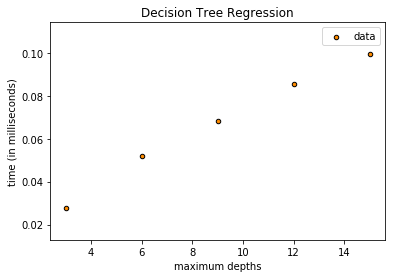

Writing output to  ../Predictions/PowerOutput/best.csv
question_1_c
Reading indoor localization dataset ...
KFold(n_splits=5, random_state=None, shuffle=False)
test with max depth: 20
time: 3.793682336807251 milliseconds
mean error: 7.164211967542345 

test with max depth: 25
time: 3.904555082321167 milliseconds
mean error: 5.688192781006826 

test with max depth: 30
time: 4.171258926391602 milliseconds
mean error: 4.991690881525672 

test with max depth: 35
time: 4.180527925491333 milliseconds
mean error: 4.615720996482895 

test with max depth: 40
time: 3.9665579795837402 milliseconds
mean error: 4.442373810927169 



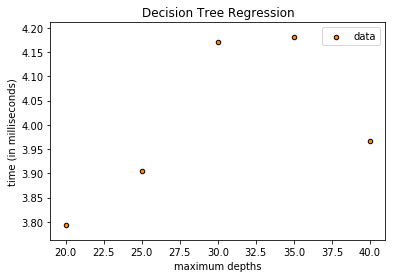

Writing output to  ../Predictions/IndoorLocalization/best.csv
question_2_a
Reading power plant dataset ...
KFold(n_splits=5, random_state=None, shuffle=False)
test with n_neighbor: 3
time: 0.03259396553039551 milliseconds
mean error: 0.5417155563489366 

test with n_neighbor: 5
time: 0.03257012367248535 milliseconds
mean error: 0.5502748924568633 

test with n_neighbor: 10
time: 0.03505682945251465 milliseconds
mean error: 0.5793826919760368 

test with n_neighbor: 20
time: 0.041684865951538086 milliseconds
mean error: 0.5953128212548892 

test with n_neighbor: 25
time: 0.04722404479980469 milliseconds
mean error: 0.5985476300725864 



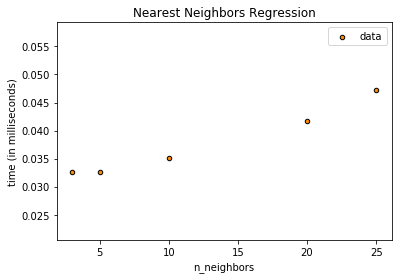

Writing output to  ../Predictions/PowerOutput/best.csv
question_2_b
Reading indoor localization dataset ...
KFold(n_splits=5, random_state=None, shuffle=False)
test with n_neighbor: 3
time: 152.83719611167908 milliseconds
mean error: 3.7628701828826365 

test with n_neighbor: 5
time: 170.3881618976593 milliseconds
mean error: 4.137021748944201 

test with n_neighbor: 10
time: 183.29741191864014 milliseconds
mean error: 4.978691467033298 

test with n_neighbor: 20
time: 199.06361889839172 milliseconds
mean error: 5.902031453633425 

test with n_neighbor: 25
time: 196.05839776992798 milliseconds
mean error: 6.2183547336005205 



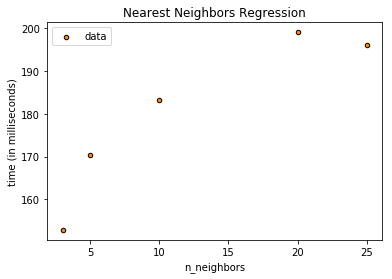

Writing output to  ../Predictions/IndoorLocalization/best.csv
question_4_b
Reading power plant dataset ...
KFold(n_splits=5, random_state=None, shuffle=False)
test with alpha: 1e-06
time: 0.02191305160522461 milliseconds
mean error: 0.19086517684328888 

test with alpha: 0.0001
time: 0.0067272186279296875 milliseconds
mean error: 0.19086517685807333 

test with alpha: 0.01
time: 0.006456851959228516 milliseconds
mean error: 0.1908651783365241 

test with alpha: 1.0
time: 0.0069119930267333984 milliseconds
mean error: 0.1908653261809337 

test with alpha: 10.0
time: 0.007339000701904297 milliseconds
mean error: 0.19086668454467365 

[0.02191305 0.00672722 0.00645685 0.00691199 0.007339  ]


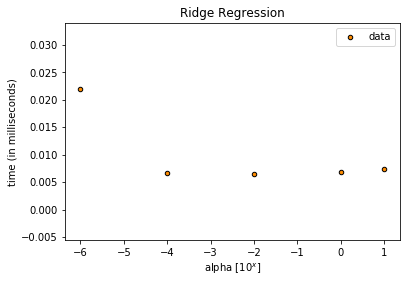

KFold(n_splits=5, random_state=None, shuffle=False)
test with alpha: 1e-06
time: 0.018288850784301758 milliseconds
mean error: 0.19086518376877895 

test with alpha: 0.0001
time: 0.012743949890136719 milliseconds
mean error: 0.19086587417243636 

test with alpha: 0.01
time: 0.008351802825927734 milliseconds
mean error: 0.19094980335203543 

test with alpha: 1.0
time: 0.0059320926666259766 milliseconds
mean error: 0.26270704085842567 

test with alpha: 10.0
time: 0.005722999572753906 milliseconds
mean error: 0.62792494228376 

[0.01828885 0.01274395 0.0083518  0.00593209 0.005723  ]


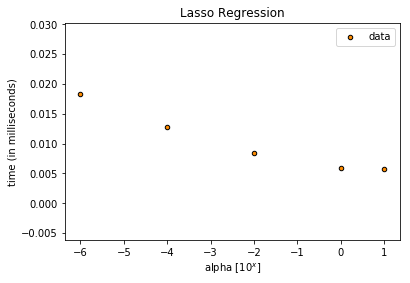

Writing output to  ../Predictions/PowerOutput/best.csv
question_4_c
Reading indoor localization dataset ...
KFold(n_splits=5, random_state=None, shuffle=False)
test with alpha: 0.0001
time: 0.5308551788330078 milliseconds
mean error: 19.650738377778683 

test with alpha: 0.01
time: 0.4647660255432129 milliseconds
mean error: 19.636605713845093 

test with alpha: 1.0
time: 0.46817517280578613 milliseconds
mean error: 19.60137290041073 

test with alpha: 10.0
time: 0.46134519577026367 milliseconds
mean error: 19.584106768665343 

[0.53085518 0.46476603 0.46817517 0.4613452 ]


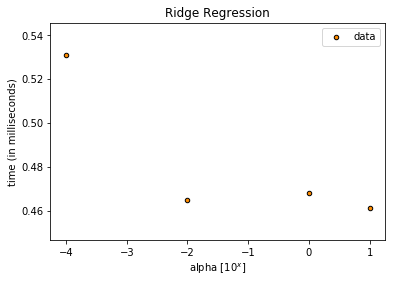

KFold(n_splits=5, random_state=None, shuffle=False)
test with alpha: 0.0001


/Users/okrymus/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


time: 40.16961097717285 milliseconds
mean error: 19.60596948373289 

test with alpha: 0.01
time: 19.91384220123291 milliseconds
mean error: 19.56379377030673 

test with alpha: 1.0
time: 5.773087978363037 milliseconds
mean error: 21.452393169285084 

test with alpha: 10.0
time: 2.5199339389801025 milliseconds
mean error: 35.588177318168924 

[40.16961098 19.9138422   5.77308798  2.51993394]


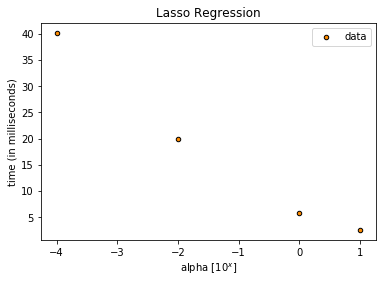

Writing output to  ../Predictions/IndoorLocalization/best.csv
question_5_a
Reading power plant dataset ...
KFold(n_splits=5, random_state=None, shuffle=False)
kfold:  5  depth:  5
0.17265854732982966
0.18138879193646268
0.17902540971608716
0.18547981542050218
0.17843072876197433
Mean error:  0.1793966586329712
kfold:  5  depth:  6
0.16786646869166236
0.17704250949772216
0.16826728877120387
0.17380113738113187
0.17190052602860673
Mean error:  0.1717755860740654
kfold:  5  depth:  7
0.15951560616713925
0.17312921582569624
0.16500808864060465
0.1638785784432425
0.16571711760693347
Mean error:  0.16544972133672325
kfold:  5  depth:  8
0.16137178050617582
0.16778399179419604
0.15864884465152115
0.1618693373392571
0.15801893072483286
Mean error:  0.1615385770031966
kfold:  5  depth:  9
0.1601271337955178
0.16503212833248315
0.155609016129718
0.16096241505336456
0.1555601995072153
Mean error:  0.1594581785636598
kfold:  5  depth:  10
0.15453522305816408
0.1645227702875136
0.15335764342975608


0.14672858136677347
0.15311612240235872
0.15575848151738172
0.16768135358135577
0.1593550720368583
0.15245883027099488
0.15614468947507237
0.16278634408478118
0.14836170111824384
0.1618171203969824
Mean error:  0.15642082962508028
kfold:  10  depth:  11
0.14567573722090302
0.15367678919761066
0.15607577836996223
0.1674215508918838
0.16090338445888167
0.15389172621331895
0.15584138719944354
0.16020016726015848
0.1510957388474805
0.16056122287840882
Mean error:  0.15653434825380516
KFold(n_splits=11, random_state=None, shuffle=False)
kfold:  11  depth:  5
0.16666622477986692
0.17797802557942938
0.18011997178041125
0.18341820974874565
0.18063437688300096
0.182563415436442
0.17497195094097748
0.18739924714128417
0.17953389935513037
0.1726406700718681
0.1873659893185994
Mean error:  0.17939018009415963
kfold:  11  depth:  6
0.1608195225629231
0.1718796602708653
0.17458239634974734
0.1751290639979293
0.1739731708819538
0.17105778420187284
0.16739951941854062
0.17740865388862936
0.17061056400

KeyboardInterrupt: 

In [193]:
def main():
    print("question_1_b")
    question_1_b()
    print("question_1_c")
    question_1_c()
    print("question_2_a")
    question_2_a()
    print("question_2_b")
    question_2_b()
    print("question_4_b")
    question_4_b()
    print("question_4_c")
    question_4_c()
    print("question_5_a")
    question_5_a()
    print("question_5_b")
    question_5_b()

if __name__ == "__main__":
    main()